# Long, Wide Data and How to Efficiently Plot Them

---
Often times when we deal with data, it comes with different formats. If you scrapped the data from a website, likely it is in **wide format**. In fact most data we physically see is in this format, since wide data is very intuitive and easier to understand. One good example would be this [NBA stat page from ESPN](https://www.espn.com/nba/stats/player/_/table/offensive/sort/avgPoints/dir/desc). 

On the other hand, **long format** data is less often to see. However it has it's own advanges like fast processing (using vectorized operation).

In this notebook, I'll show how the transform the data between the two formats, how is long format faster to process, and how to effeciently plot each format.

---

*Note: the weather data is retrieved from [this website](https://w2.weather.gov/climate/xmacis.php?wfo=mtr)  .*

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [58]:
# load the data to dataframe
sf = pd.read_csv('SF_rainfall.csv')
sac = pd.read_csv('Sacramento_rainfall.csv') 

In [59]:
sf.head(2)

,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Annual
0,2000,6.41,8.96,2.04,1.66,1.4,0.16,0.02,0.02,0.21,2.38,0.85,0.90,25.01
1,2001,3.76,7.73,1.58,1.89,0.0,0.15,0.01,0.05,0.18,0.51,5.18,10.75,31.79


In [60]:
sac.head(2)

,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Annual
0,2000,7.20,8.93,2.26,2.05,1.36,0.03,0.0,0.0,0.17,2.57,0.76,0.55,25.88
1,2001,4.48,4.79,2.15,1.70,0.00,0.14,0.0,0.0,0.33,0.35,2.33,5.99,22.26


In [61]:
sf.tail(2)
sf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 14 columns):
Year      20 non-null int64
Jan       20 non-null float64
Feb       20 non-null float64
Mar       20 non-null float64
Apr       20 non-null float64
May       20 non-null float64
Jun       20 non-null float64
Jul       20 non-null float64
Aug       20 non-null float64
Sep       20 non-null float64
Oct       20 non-null float64
Nov       20 non-null float64
Dec       20 non-null object
Annual    20 non-null object
dtypes: float64(11), int64(1), object(2)
memory usage: 2.3+ KB


In [62]:
print(type(sf.Dec[3]))
sf.iloc[:-1, 12] = sf.iloc[:-1, 12].astype(float)
print(type(sf.Dec[3]))

<class 'str'>
<class 'float'>


In [63]:
sf.iloc[19, 12] = round(sf.iloc[:-1, 12].mean(),2)
sf.iloc[19, 13] = sf.iloc[19, 1:-1].sum()

In [64]:
sf.tail(2)

,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Annual
18,2018,5.21,0.21,4.54,3.91,0.04,0.01,0.0,0.0,0.00,0.21,3.56,2.18,19.87
19,2019,5.13,7.94,4.31,0.43,1.94,0.00,0.0,0.0,0.12,0.01,1.46,5.4,26.74


In [65]:
sac.iloc[:-1, 12] = sac.iloc[:-1, 12].astype(float)
sac.iloc[19, 12] = round(sac.iloc[:-1, 12].mean(),2)
sac.iloc[19, 13] = sac.iloc[19, 1:-1].sum()

In [69]:
sac.tail(2)

,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Annual
18,2018,5.07,0.66,5.37,2.45,0.42,0.0,0.0,0.0,0.00,0.04,2.36,2.65,19.02
19,2019,4.65,8.90,3.20,0.59,3.42,0.0,0.0,0.0,0.06,0.00,0.71,3.69,25.22


In [87]:
months = list(sf.columns)[1:13]
list(sf[months])

['Jan',
 'Feb',
 'Mar',
 'Apr',
 'May',
 'Jun',
 'Jul',
 'Aug',
 'Sep',
 'Oct',
 'Nov',
 'Dec']

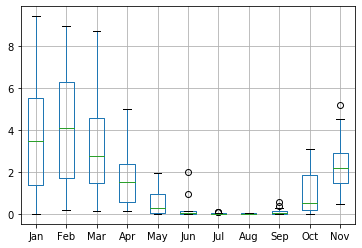

In [92]:
#fig, ax = plt.subplots()
sf_box = sf[months].boxplot()
#sac[months].boxplot()
plt.show()